In [1]:
curr_trial = "freestyle1"
#curr_trial = "3"

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from subjects.constants import NIMBLE_BODY_NODES_UIP, NIMBLE_BODY_NODES_DIP, NIMBLE_BODY_NODES_TOTAL_CAPTURE
from subjects.uip_subject import UIPSubject
from subjects.dip_imu_subject import DIPSubject
from subjects.total_capture_subject import TotalCaptureSubject

import nimblephysics as nimble

GEOMETRY_PATH = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/Geometry/"
trial_path_uip = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/UIP/S0.b3d"
trial_path_dip = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/DIP/S1.b3d"
trial_path_tot_cap = "/home/meribejayson/Desktop/Projects/realistic-imu/data/final_dataset/Total-Capture/S1.b3d"

Setting len to 0.101812
Setting neutral pos to   0
0.7
  0
Setting len to 0.34597
Setting neutral pos to    0
-0.6
   0
Setting len to 0.112955
Setting neutral pos to   0
0.2
  0


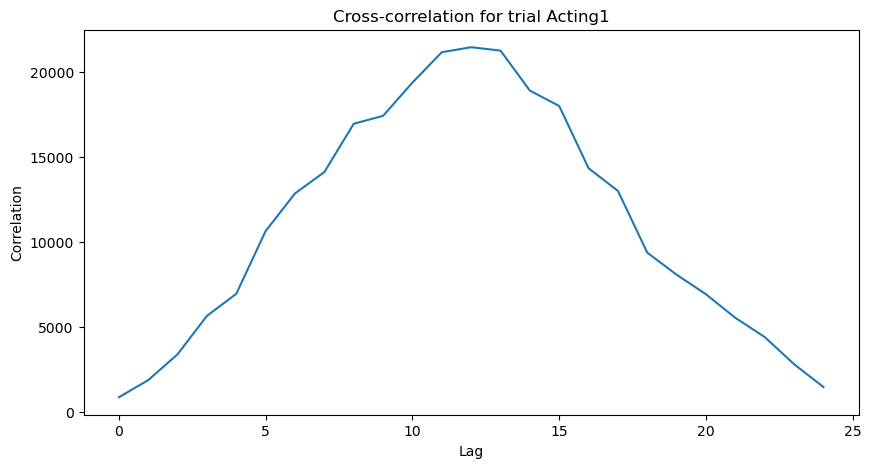

12


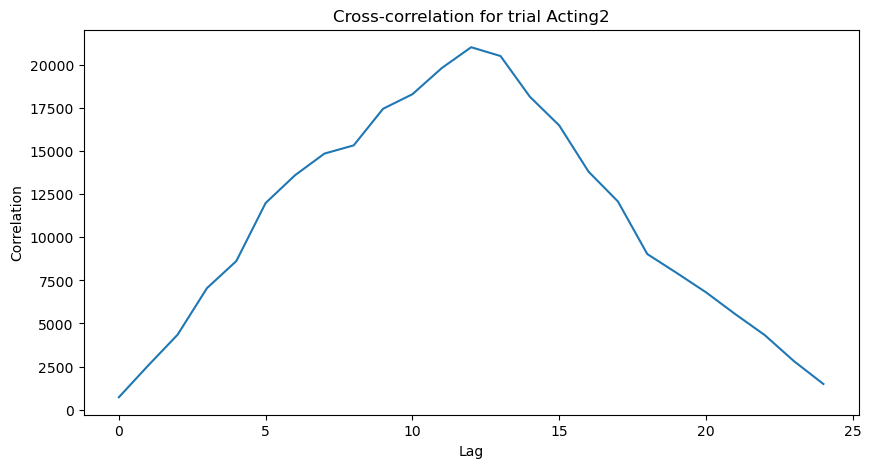

12


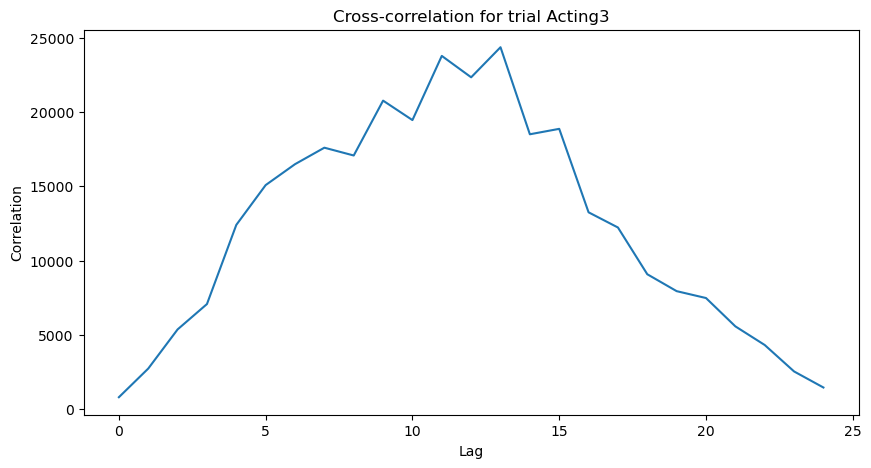

13


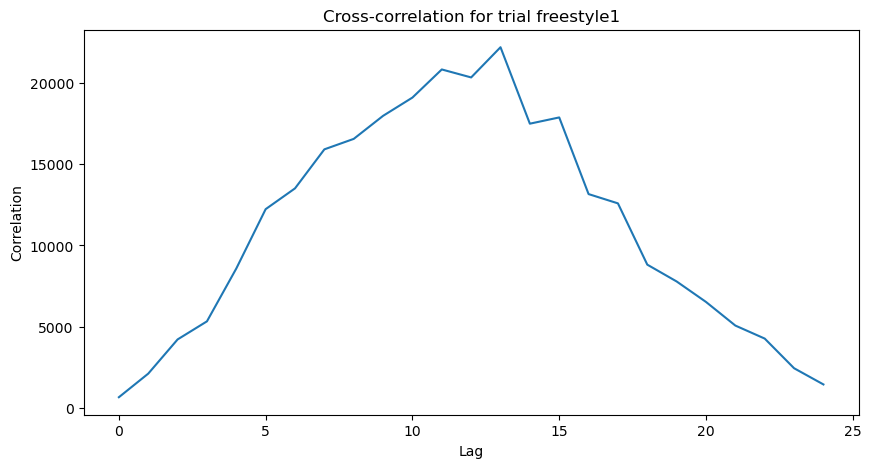

13


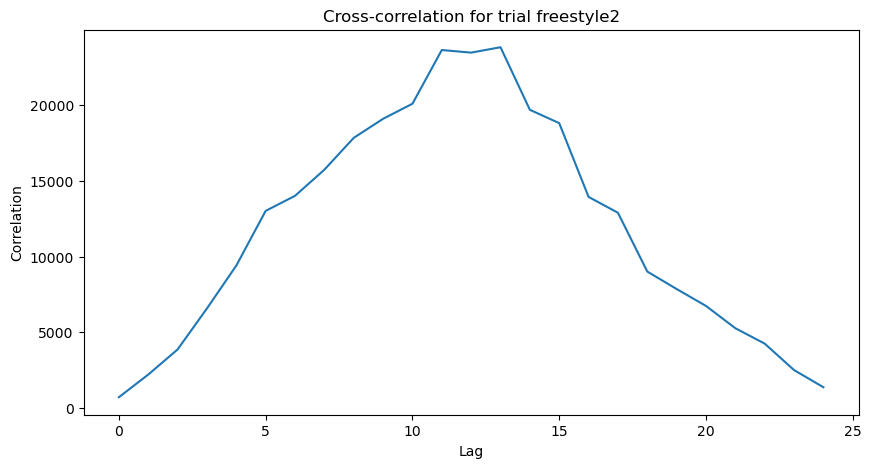

13


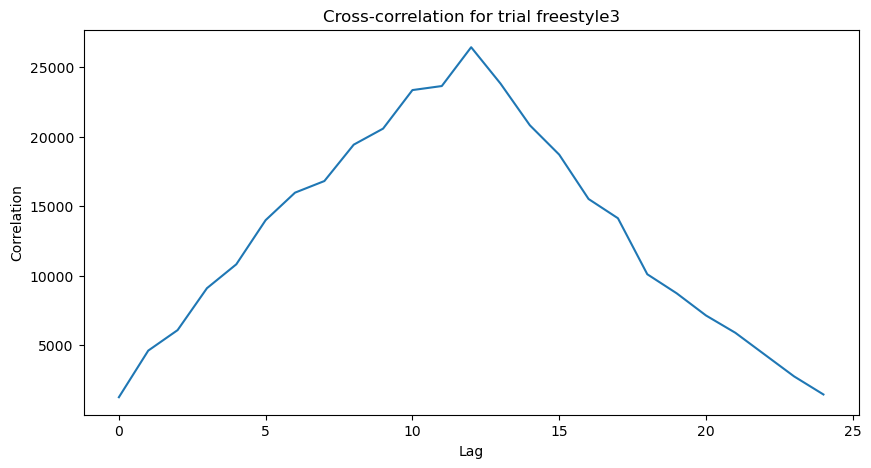

12


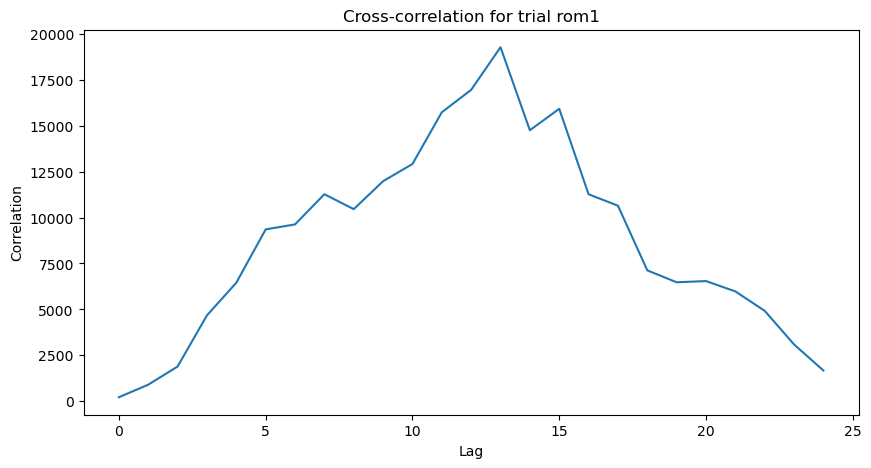

13


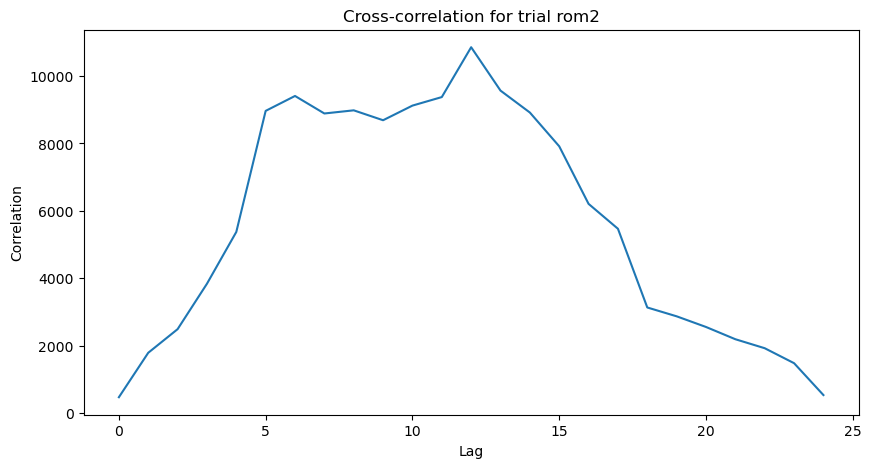

12


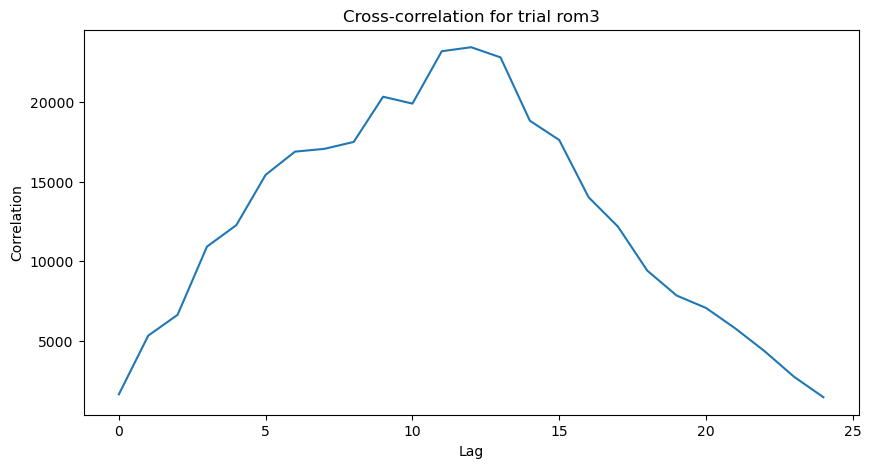

12


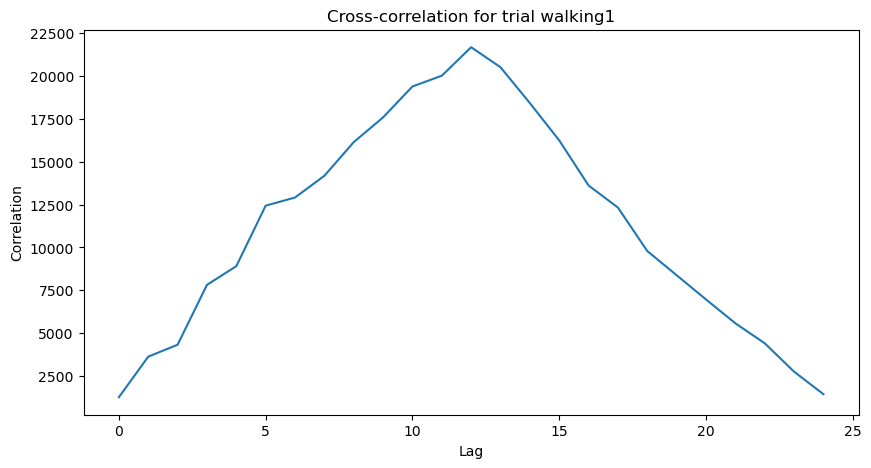

12


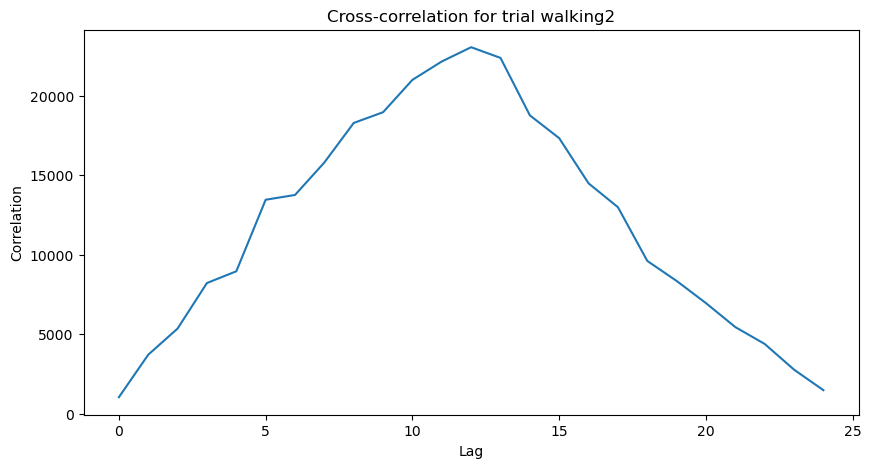

12


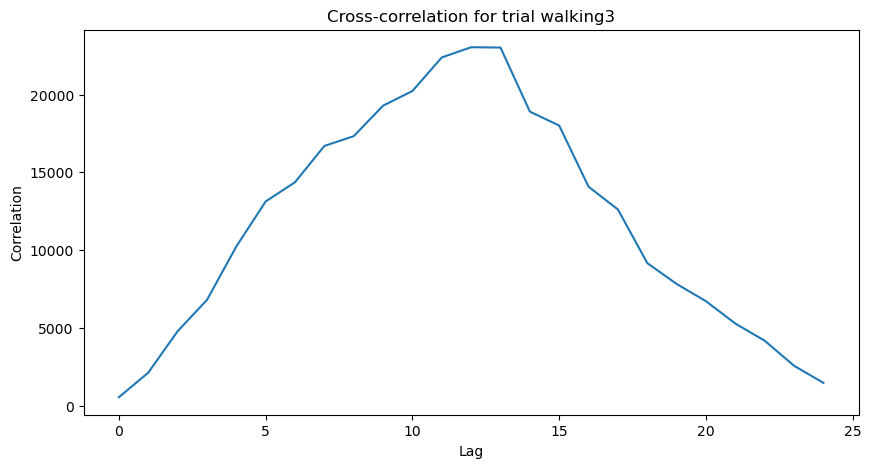

12


RuntimeError: The size of tensor a (4103) must match the size of tensor b (4114) at non-singleton dimension 0

In [3]:
subject = TotalCaptureSubject(trial_path_tot_cap, GEOMETRY_PATH, NIMBLE_BODY_NODES_TOTAL_CAPTURE)
# subject = UIPSubject(trial_path_uip, GEOMETRY_PATH, NIMBLE_BODY_NODES_UIP)

In [17]:
synthetic_accelerations = subject.syn_imu[curr_trial]["acc"]
real_accelerations = subject.trial_imu_map[curr_trial]["acc"]

In [18]:
synthetic_accelerations.shape

(2311, 13, 3)

In [19]:
np.mean(synthetic_accelerations - real_accelerations)

-0.8543492780314195

In [20]:
subject.generate_nimble_visualization(curr_trial)

Errer in GUIWebsocketServer::serve()! Already serving. Ignoring request.
Web GUI serving on http://localhost:47855


 30%|██▉       | 690/2311 [00:12<00:29, 55.59it/s]127.0.0.1 - - [24/May/2025 04:45:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/May/2025 04:45:33] "GET /bundle.js HTTP/1.1" 200 -
 49%|████▉     | 1140/2311 [00:21<00:22, 53.08it/s]Connection closed.
There are now 1 open connections.
100%|██████████| 2311/2311 [00:43<00:00, 53.25it/s]


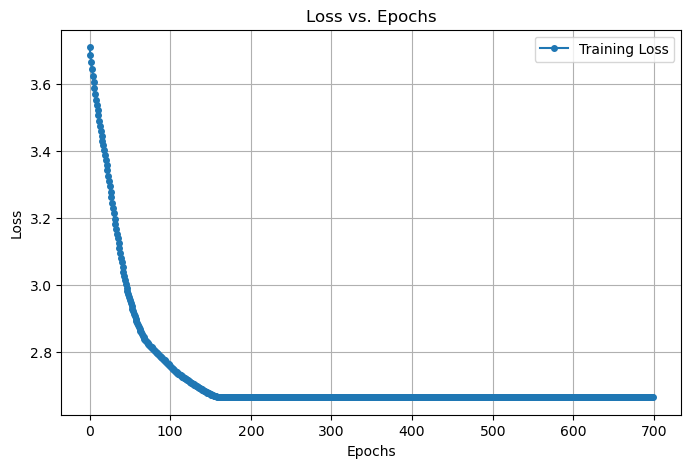

In [21]:
losses = subject.opt_trans[curr_trial]["losses"]

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(losses)), losses, label="Training Loss", marker="o", linestyle="-", markersize=4)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()

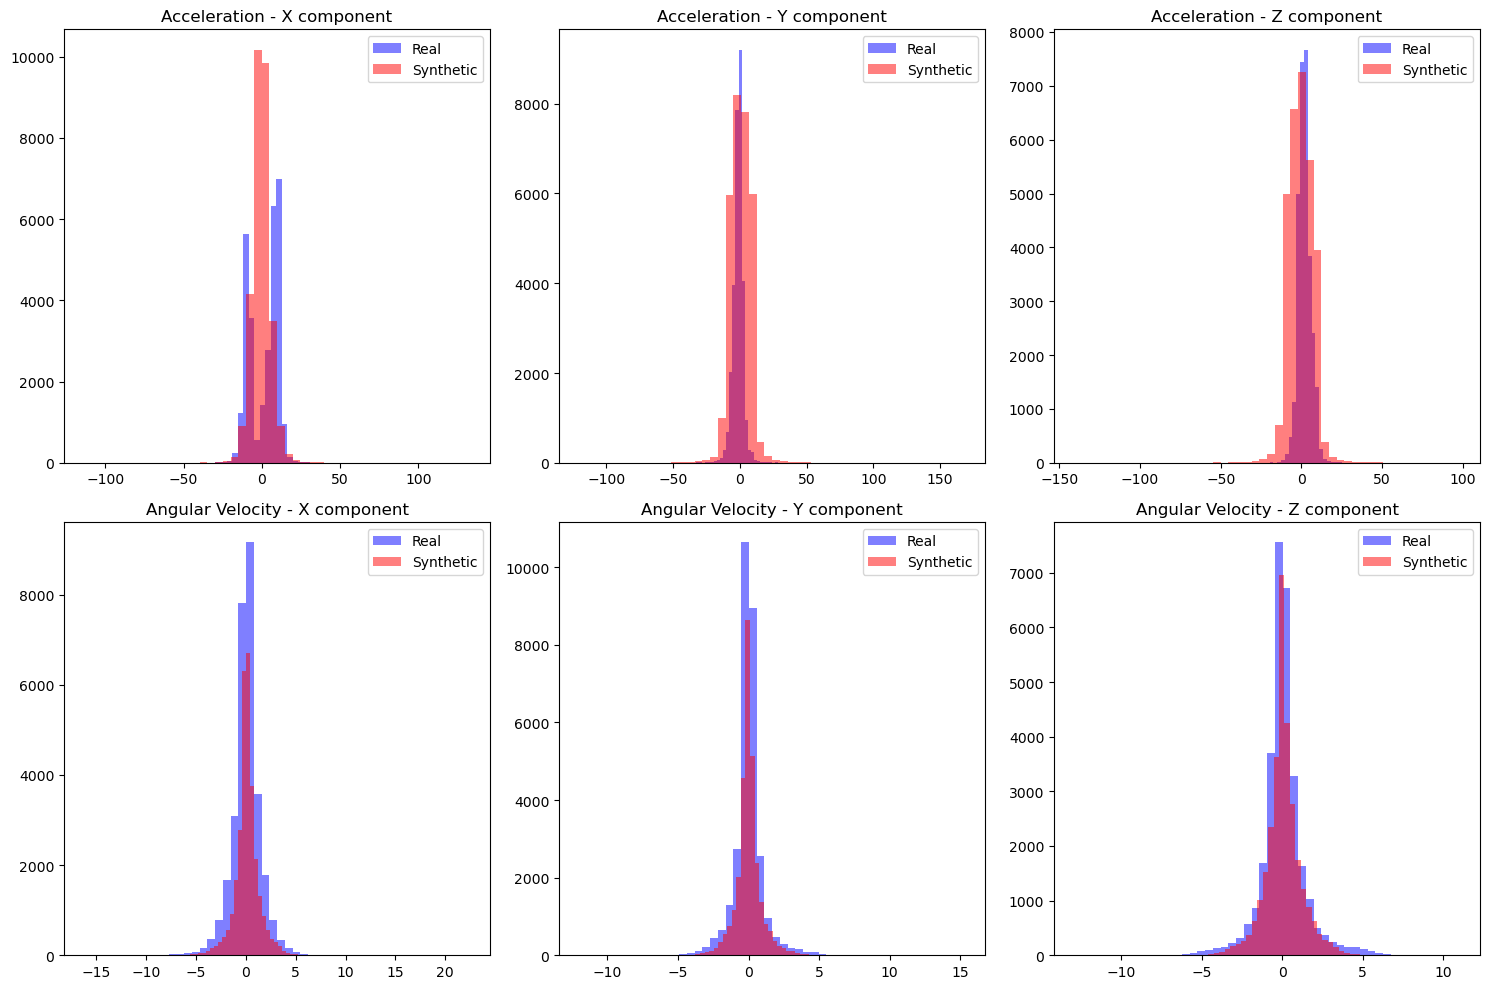

In [22]:
# Create subplots for acceleration and angular velocity comparisons
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

# Define number of bins for histograms
n_bins = 50

# Plot histogram for acceleration - X component
ax1.hist(subject.trial_imu_map[curr_trial]["acc"][:, :, 0].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax1.hist(subject.syn_imu[curr_trial]["acc"][:, :, 0].flatten(), bins=n_bins, alpha=0.5, label='Synthetic', color='red')
ax1.set_title('Acceleration - X component')
ax1.legend()

# Plot histogram for acceleration - Y component  
ax2.hist(subject.trial_imu_map[curr_trial]["acc"][:, :, 1].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax2.hist(subject.syn_imu[curr_trial]["acc"][:, :, 1].flatten(), bins=n_bins, alpha=0.5, label='Synthetic', color='red')
ax2.set_title('Acceleration - Y component')
ax2.legend()

# Plot histogram for acceleration - Z component
ax3.hist(subject.trial_imu_map[curr_trial]["acc"][:, :, 2].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax3.hist(subject.syn_imu[curr_trial]["acc"][:, :, 2].flatten(), bins=n_bins, alpha=0.5, label='Synthetic', color='red')
ax3.set_title('Acceleration - Z component')
ax3.legend()

# Plot histogram for angular velocity - X component
ax4.hist(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 0].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax4.hist(subject.syn_imu[curr_trial]["angular_vel"][:, :, 0].flatten(), bins=n_bins, alpha=0.5, label='Synthetic',
         color='red')
ax4.set_title('Angular Velocity - X component')
ax4.legend()

# Plot histogram for angular velocity - Y component
ax5.hist(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 1].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax5.hist(subject.syn_imu[curr_trial]["angular_vel"][:, :, 1].flatten(), bins=n_bins, alpha=0.5, label='Synthetic',
         color='red')
ax5.set_title('Angular Velocity - Y component')
ax5.legend()

ax6.hist(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 2].flatten(), bins=n_bins, alpha=0.5, label='Real',
         color='blue')
ax6.hist(subject.syn_imu[curr_trial]["angular_vel"][:, :, 2].flatten(), bins=n_bins, alpha=0.5, label='Synthetic',
         color='red')
ax6.set_title('Angular Velocity - Z component')
ax6.legend()

plt.tight_layout()
plt.show()


In [23]:
# Calculate Euclidean length means for accelerations and angular velocities
acc_means = {
    'real': {
        'x': np.mean(subject.trial_imu_map[curr_trial]["acc"][:, :, 0]),
        'y': np.mean(subject.trial_imu_map[curr_trial]["acc"][:, :, 1]),
        'z': np.mean(subject.trial_imu_map[curr_trial]["acc"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["acc"] ** 2, axis=2)))
    },
    'synthetic': {
        'x': np.mean(subject.syn_imu[curr_trial]["acc"][:, :, 0]),
        'y': np.mean(subject.syn_imu[curr_trial]["acc"][:, :, 1]),
        'z': np.mean(subject.syn_imu[curr_trial]["acc"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.syn_imu[curr_trial]["acc"] ** 2, axis=2)))
    }
}

ang_vel_means = {
    'real': {
        'x': np.mean(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 0]),
        'y': np.mean(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 1]),
        'z': np.mean(subject.trial_imu_map[curr_trial]["ang_vel"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["ang_vel"] ** 2, axis=2)))
    },
    'synthetic': {
        'x': np.mean(subject.syn_imu[curr_trial]["angular_vel"][:, :, 0]),
        'y': np.mean(subject.syn_imu[curr_trial]["angular_vel"][:, :, 1]),
        'z': np.mean(subject.syn_imu[curr_trial]["angular_vel"][:, :, 2]),
        'euclidean': np.mean(np.sqrt(np.sum(subject.syn_imu[curr_trial]["angular_vel"] ** 2, axis=2)))
    }
}

print("\nAcceleration Means:")
for type_, values in acc_means.items():
    print(f"\n{type_.capitalize()}:")
    print(f"X: {values['x']:.4f}")
    print(f"Y: {values['y']:.4f}")
    print(f"Z: {values['z']:.4f}")
    print(f"Euclidean Length: {values['euclidean']:.4f}")

print("\nAngular Velocity Means:")
for type_, values in ang_vel_means.items():
    print(f"\n{type_.capitalize()}:")
    print(f"X: {values['x']:.4f}")
    print(f"Y: {values['y']:.4f}")
    print(f"Z: {values['z']:.4f}")
    print(f"Euclidean Length: {values['euclidean']:.4f}")



Acceleration Means:

Real:
X: 1.6439
Y: -1.4143
Z: 1.9295
Euclidean Length: 10.6985

Synthetic:
X: -0.3743
Y: 0.4448
Z: -0.4744
Euclidean Length: 11.1938

Angular Velocity Means:

Real:
X: 0.0431
Y: -0.0055
Z: 0.0486
Euclidean Length: 1.6887

Synthetic:
X: 0.1172
Y: 0.0027
Z: 0.0645
Euclidean Length: 1.4924


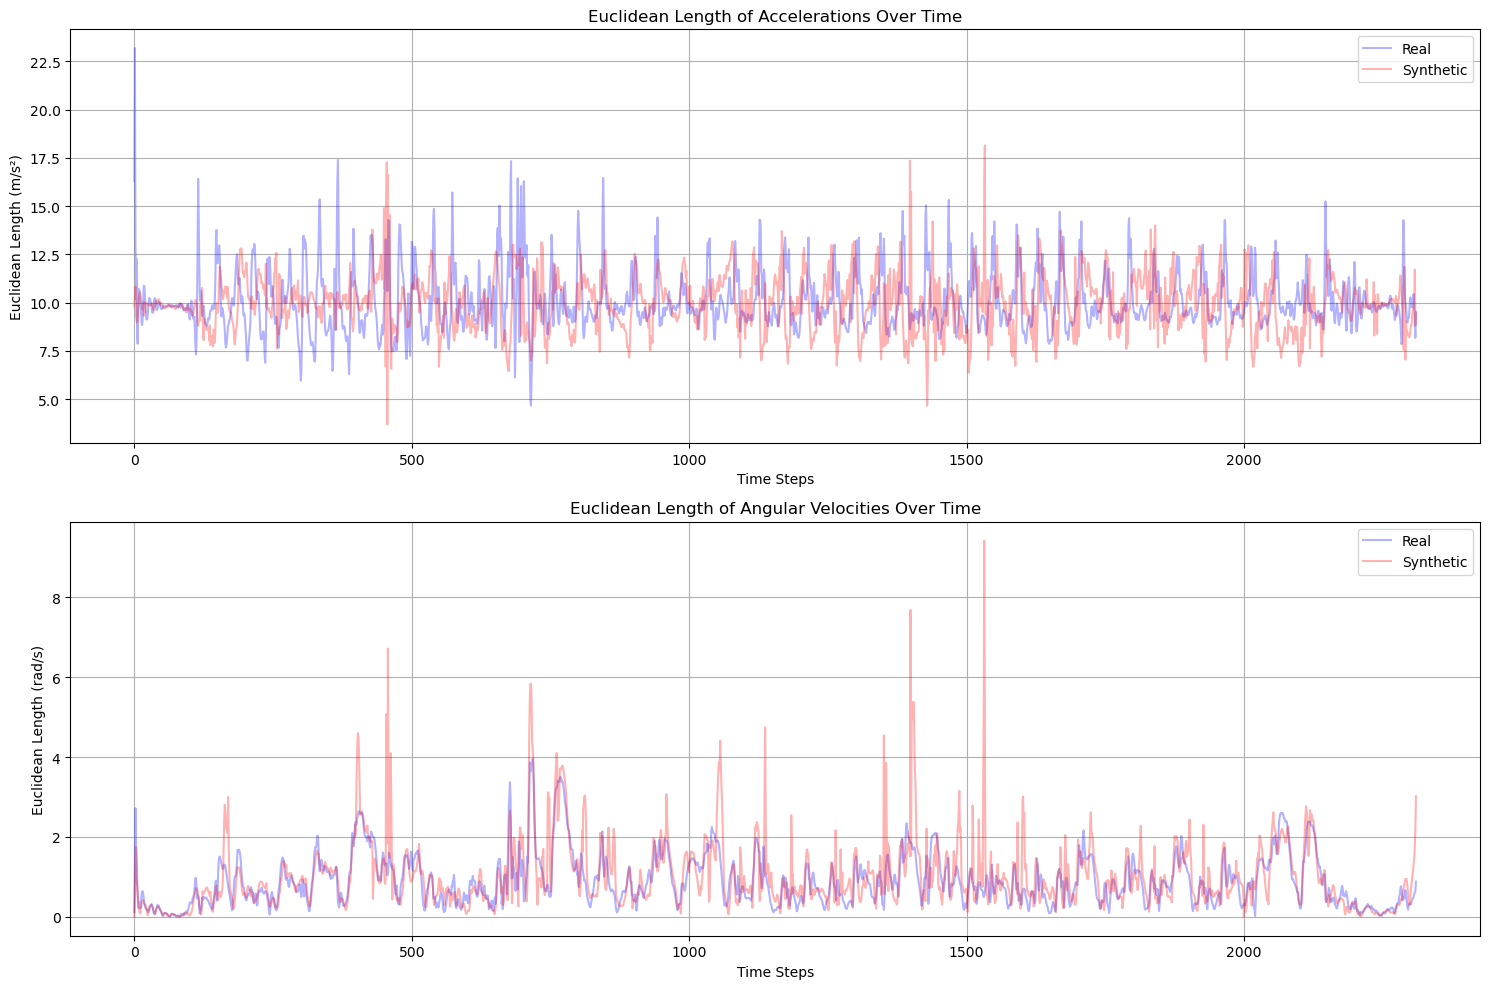

In [24]:
# Calculate Euclidean lengths over time
real_acc_euclidean = np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["acc"][:, 0] ** 2, axis=-1))
syn_acc_euclidean = np.sqrt(np.sum(subject.syn_imu[curr_trial]["acc"][:, 0] ** 2, axis=-1))
real_angvel_euclidean = np.sqrt(np.sum(subject.trial_imu_map[curr_trial]["ang_vel"][:, 0] ** 2, axis=-1))
syn_angvel_euclidean = np.sqrt(np.sum(subject.syn_imu[curr_trial]["angular_vel"][:, 0] ** 2, axis=-1))

# Create stacked plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot accelerations
time = np.arange(real_acc_euclidean.shape[0])
ax1.plot(time, real_acc_euclidean, 'b-', alpha=0.3, label='Real')
ax1.plot(time, syn_acc_euclidean, 'r-', alpha=0.3, label='Synthetic')
ax1.set_title('Euclidean Length of Accelerations Over Time')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Euclidean Length (m/s²)')
ax1.legend()
ax1.grid(True)

# Plot angular velocities
ax2.plot(time, real_angvel_euclidean, 'b-', alpha=0.3, label='Real')
ax2.plot(time, syn_angvel_euclidean, 'r-', alpha=0.3, label='Synthetic')
ax2.set_title('Euclidean Length of Angular Velocities Over Time')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('Euclidean Length (rad/s)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [25]:
subject.joint_data_map[curr_trial]["joint_angles"].shape

(49, 2311)

In [26]:
def print_joint_std(subject, trial_name):
    joint_angles = subject.joint_data_map[trial_name]["joint_angles"]
    joint_vel = subject.joint_data_map[trial_name]["joint_vel"]
    joint_acc = subject.joint_data_map[trial_name]["joint_acc"]

    print("Joint Angles Standard Deviation:", np.std(joint_angles, axis=1))
    print("\nJoint Velocities Standard Deviation:", np.std(joint_vel, axis=1))
    print("\nJoint Accelerations Standard Deviation:", np.std(joint_acc, axis=1))


print_joint_std(subject, curr_trial)

Joint Angles Standard Deviation: [1.56082333 0.04152645 0.44967781 0.65698358 1.02627407 0.01374298
 0.20488019 0.10356071 0.19317277 0.28166816 0.10546042 0.18338563
 0.14956213 0.1663545  0.10835663 0.16489158 0.29734379 0.11218782
 0.13420655 0.09943169 0.08610045 0.07106158 0.04303494 0.08200842
 0.05867367 0.13802163 0.07657318 0.24491965 0.26569984 0.06707591
 0.02307734 0.18147662 0.28827859 0.30690842 0.25965592 0.35152024
 0.19705105 0.08017619 0.10505843 0.06383579 0.0268608  0.21712122
 0.29048427 0.32760824 0.25106376 0.38674857 0.18340509 0.10424563
 0.08216835]

Joint Velocities Standard Deviation: [2.50305968 0.17345137 1.89958344 0.34975152 0.48778037 0.09485407
 0.79176335 0.47019903 0.68282321 1.41155869 0.66358714 0.86171653
 0.63255717 0.66636821 0.46120154 0.69855213 1.36744087 0.54681294
 0.78013364 0.51557452 0.38071598 0.28129461 0.21633196 0.3272681
 0.15141888 0.58359276 0.23722721 0.32386461 0.59924736 0.11273058
 0.05160151 0.24395051 0.6889046  0.82155213 0

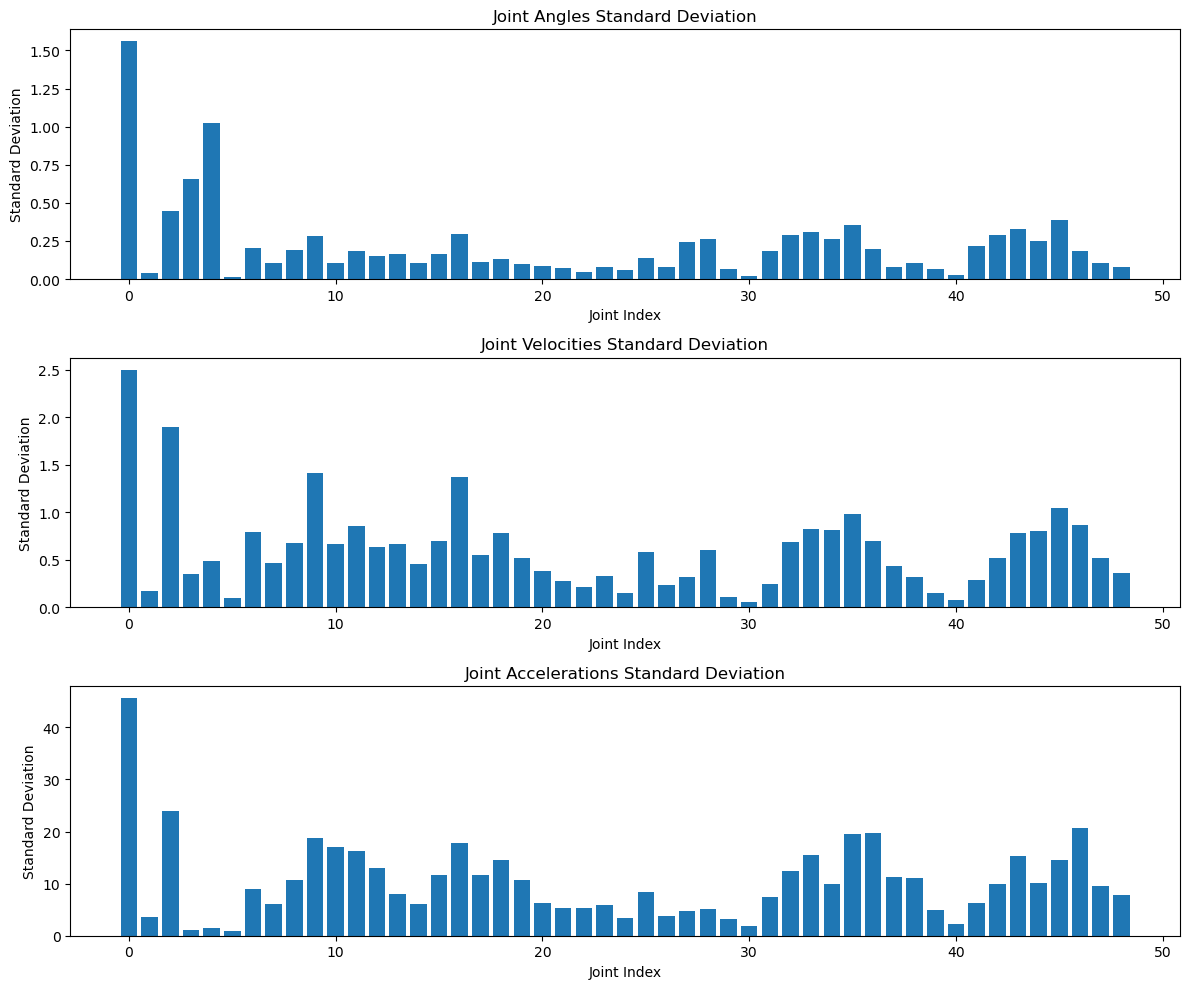

In [27]:
# Visualize the standard deviations
joint_angles_std = np.std(subject.joint_data_map[curr_trial]["joint_angles"], axis=1)
joint_vel_std = np.std(subject.joint_data_map[curr_trial]["joint_vel"], axis=1)
joint_acc_std = np.std(subject.joint_data_map[curr_trial]["joint_acc"], axis=1)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

ax1.bar(range(len(joint_angles_std)), joint_angles_std)
ax1.set_title('Joint Angles Standard Deviation')
ax1.set_xlabel('Joint Index')
ax1.set_ylabel('Standard Deviation')

ax2.bar(range(len(joint_vel_std)), joint_vel_std)
ax2.set_title('Joint Velocities Standard Deviation')
ax2.set_xlabel('Joint Index')
ax2.set_ylabel('Standard Deviation')

ax3.bar(range(len(joint_acc_std)), joint_acc_std)
ax3.set_title('Joint Accelerations Standard Deviation')
ax3.set_xlabel('Joint Index')
ax3.set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()


In [28]:
body_node_names = [subject.skeleton.getBodyNode(name).getName() for name in NIMBLE_BODY_NODES_DIP]
print(body_node_names)

['head', 'thorax', 'pelvis', 'scapula_l', 'scapula_r', 'humerus_l', 'humerus_r', 'ulna_l', 'ulna_r', 'femur_l', 'femur_r', 'tibia_l', 'tibia_r', 'hand_l', 'hand_r', 'calcn_l', 'calcn_r']
